In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score


In [25]:
# Reading the datasets
bank_df = pd.read_csv('bank.csv', delimiter=';')
weight_height_df = pd.read_csv('weight-height.csv')


In [29]:
print(df3.dtypes)


y                    int64
job_admin.            bool
job_blue-collar       bool
job_entrepreneur      bool
job_housemaid         bool
job_management        bool
job_retired           bool
job_self-employed     bool
job_services          bool
job_student           bool
job_technician        bool
job_unemployed        bool
job_unknown           bool
marital_divorced      bool
marital_married       bool
marital_single        bool
default_no            bool
default_yes           bool
housing_no            bool
housing_yes           bool
poutcome_failure      bool
poutcome_other        bool
poutcome_success      bool
poutcome_unknown      bool
dtype: object


In [31]:
df3['y'] = df3['y'].apply(lambda val: 1 if val == 'yes' else 0)


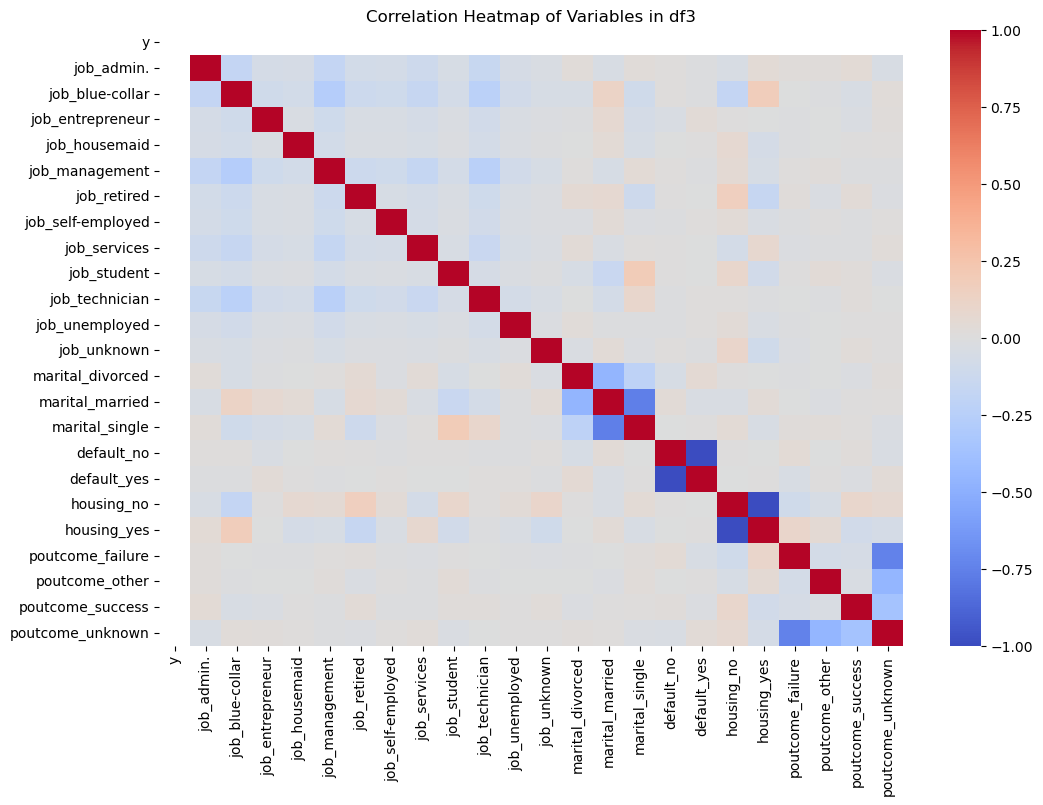

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Variables in df3")
plt.show()


In [37]:
print(df3.select_dtypes(exclude='number').columns)


Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [41]:
from sklearn.model_selection import train_test_split

# Assuming df3 is ready and numeric
# Define the target variable (y) and explanatory variables (X)
X = df3.drop(columns=['y'])  # Drop the target variable column
y = df3['y']  # Select the target variable

# Split the dataset into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3390, 23)
X_test shape: (1131, 23)
y_train shape: (3390,)
y_test shape: (1131,)


In [43]:
from sklearn.model_selection import train_test_split

# Assuming df3 is ready and numeric
# Define the target variable (y) and explanatory variables (X)
X = df3.drop(columns=['y'])  # Drop the target variable column
y = df3['y']  # Select the target variable

# Split the dataset into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3390, 23)
X_test shape: (1131, 23)
y_train shape: (3390,)
y_test shape: (1131,)


In [53]:
print("Unique values in y_train:", y_train.unique())
print("Value counts in y_train:", y_train.value_counts())


Unique values in y_train: [0]
Value counts in y_train: y
0    3390
Name: count, dtype: int64


In [57]:
print("Unique values in y_train:", y_train.unique())
print("Value counts in y_train:", y_train.value_counts())


Unique values in y_train: [0]
Value counts in y_train: y
0    3390
Name: count, dtype: int64


In [59]:
# Check distribution of target variable in the entire dataset
print("Unique values in y:", y.unique())
print("Value counts in y:", y.value_counts())

# Check distribution of target variable in the training set
print("Unique values in y_train after split:", y_train.unique())
print("Value counts in y_train:", y_train.value_counts())


Unique values in y: [0]
Value counts in y: y
0    4521
Name: count, dtype: int64
Unique values in y_train after split: [0]
Value counts in y_train: y
0    3390
Name: count, dtype: int64


In [61]:
# If both classes are present, try SMOTE again:
if len(y_train.unique()) > 1:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Train the model with the balanced dataset
    log_reg.fit(X_train_balanced, y_train_balanced)
    y_pred = log_reg.predict(X_test)

    # Evaluate the model as before
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [65]:
# If both classes are present, try SMOTE again:
if len(y_train.unique()) > 1:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Train the model with the balanced dataset
    log_reg.fit(X_train_balanced, y_train_balanced)
    y_pred = log_reg.predict(X_test)

    # Evaluate the model as before
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [73]:
# Check the distribution of target variable 'y'
print(y_train.value_counts())


y
0    3390
Name: count, dtype: int64


In [75]:
# Check the distribution of the target variable
print(y_train.value_counts())


y
0    3390
Name: count, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split

# Split the dataset while maintaining the class distribution in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop(columns=['y']),  # Explanatory variables
    df3['y'],  # Target variable
    test_size=0.25,  # 75% for training and 25% for testing
    random_state=42,
    stratify=df3['y']  # Ensures both classes are represented
)


In [81]:
# Check the class distribution after the split
print("Training target variable distribution:\n", y_train.value_counts())
print("Testing target variable distribution:\n", y_test.value_counts())


Training target variable distribution:
 y
0    3390
Name: count, dtype: int64
Testing target variable distribution:
 y
0    1131
Name: count, dtype: int64


In [92]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"Training set X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing set X shape: {X_test.shape}, y shape: {y_test.shape}")


Training set X shape: (3616, 23), y shape: (3616,)
Testing set X shape: (905, 23), y shape: (905,)


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform the training data with normalization (Min-Max Scaling)
X_train_norm = min_max_scaler.fit_transform(X_train)

# Transform the testing data using the same scaler (to avoid data leakage)
X_test_norm = min_max_scaler.transform(X_test)

# Fit and transform the training data with standardization (Z-score)
X_train_std = standard_scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_std = standard_scaler.transform(X_test)

# Output the results (for example, the first 5 values)
print("Normalized training data (first 5 samples):")
print(X_train_norm[:5])
print("\nStandardized training data (first 5 samples):")
print(X_train_std[:5])


Normalized training data (first 5 samples):
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]]

Standardized training data (first 5 samples):
[[-0.33302597 -0.51456573  5.24141593 -0.16067235 -0.52143637 -0.23939495
  -0.20803258 -0.31900974 -0.14050108 -0.45712166 -0.16864581 -0.09449112
   2.7474467  -1.27589458 -0.59821992  0.12427832 -0.12427832  1.12754458
  -1.12754458 -0.34669621 -0.21375489 -0.17377983  0.4690128 ]
 [-0.33302597 -0.51456573 -0.19078814 -0.16067235  1.91777955 -0.23939495
  -0.20803258 -0.31900974 -0.14050108 -0.45712166 -0.16864581 -0.09449112
  -0.3639743   0.78376381 -0.59821992  0.12427832 -0.12427832  1.12754458
  -1.12754458 -0.34669621 -0.21375489 -0.

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN model to the unscaled training data
knn.fit(X_train, y_train)

# Predict the target variable for the testing data (without scaling)
y_pred = knn.predict(X_test)

# Compute the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print("R² score for KNN regression (without scaling):", r2)


R² score for KNN regression (without scaling): 1.0
